##  Real-World Data Representation Using Tensors in PyTorch

 Key Topics Covered in This Chapter
- **Converting real-world data into PyTorch tensors**
- **Working with different data types**
- **Loading data from files**
- **Reshaping tensors for use in neural networks**

 Data Representation and Processing
A critical challenge in deep learning is **representing different types of data as tensors**. This chapter demonstrates how to:
1. **Transform images, medical volumes, tabular data, time series, and text into tensor formats.**  
2. **Load data from common file formats and preprocess it for deep learning models.**  
3. **Perform tensor operations to ensure data is correctly shaped before feeding it into a model.**  

Since images and volumetric data are **widely used in deep learning**, this chapter starts with **image processing**, followed by structured datasets like **tabular data, time series, and text**.

---

###  Images in PyTorch
- **Convolutional Neural Networks (CNNs)** have revolutionized **computer vision**, allowing networks to learn from paired input-output examples rather than relying on handcrafted features.
- **Image Representation**: Images are structured as grids of **scalars (pixel values)**, typically represented as:
  - **Grayscale images**: Single scalar per pixel.
  - **Color images**: Multiple scalars per pixel (e.g., **RGB channels**).
- **Encoding Colors**: The most common color representation is **RGB**, where three separate channels define **red, green, and blue intensities**.
- **Precision Differences**: Consumer images use **8-bit integers**, while specialized applications (medical, industrial, scientific) may use **higher precision (12-bit or 16-bit)** for greater detail.

In [1]:
#Loading Images in Python
import imageio
img_arr = imageio.imread('data/p1ch4/image-dog/bobby.jpg')
print(img_arr.shape)  # Output: (720, 1280, 3)


(720, 1280, 3)


C:\Users\rsole\AppData\Local\Temp\ipykernel_41384\1417110624.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread('data/p1ch4/image-dog/bobby.jpg')


In [2]:
#Use permute(2, 0, 1) to convert H × W × C into C × H × W format
import torch
img = torch.from_numpy(img_arr)
img = img.permute(2, 0, 1)
print(img.shape)

torch.Size([3, 720, 1280])


In [3]:
#Example of pre-allocating a batch tensor of three RGB images (256 × 256 pixels)
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)


In [4]:
#Load multiple PNG images into the batch
import os
data_dir = 'data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir) if name.endswith('.png')]

for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr).permute(2, 0, 1)[:3]  # Keep only RGB channels
    batch[i] = img_t
print(f"batch.shape: {batch.shape}")

batch.shape: torch.Size([3, 3, 256, 256])


C:\Users\rsole\AppData\Local\Temp\ipykernel_41384\1998287943.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(data_dir, filename))


In [5]:
batch = batch.float()
batch /= 255.0

In [16]:
#Mean-std normalization: Center data by subtracting the mean and dividing by standard deviation.

n_channels = batch.shape[1]
print(f"n_channels: {n_channels}")
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std


n_channels: 3


### 3D Images and Volumetric Data in PyTorch

**Understanding Volumetric Data**  
- Unlike 2D images, **3D medical imaging** (e.g., **CT scans**) consists of **stacked image slices** forming a **volumetric representation** of the human body.  
- CT scans measure **X-ray absorption**, where intensity represents **tissue density** (lungs, fat, water, muscle, bone) from dark to bright.
- These scans **typically lack a channel dimension**, similar to grayscale images, but can be **stacked into a 3D tensor** to represent full anatomy.


In [6]:
# CT scans are often stored in DICOM format, a medical imaging standard.
# Use imageio.volread() to load a 3D NumPy array from a directory containing DICOM files
import imageio
dir_path = "data/p1ch4/volumetric-dicom/2-LUNG"
vol_arr = imageio.volread(dir_path, 'DICOM')
print(vol_arr.shape)  # Output: (99, 512, 512)
#The 99 slices represent depth.


Reading DICOM (examining files): 1/99 files (1.0%22/99 files (22.2%36/99 files (36.4%46/99 files (46.5%57/99 files (57.6%69/99 files (69.7%79/99 files (79.8%90/99 files (90.9%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)
(99, 512, 512)


In [7]:
#Since the channel dimension is missing, we need to add it manually

import torch
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)  # Add channel dimension
print(vol.shape)  # Output: torch.Size([1, 99, 512, 512])


torch.Size([1, 99, 512, 512])


Key Takeaways
- ✅ 3D medical images are stacks of 2D slices with intensity values representing tissue density.
- ✅ PyTorch expects an extra channel dimension, which can be added using unsqueeze().


In [20]:
# Loading and Visualizing a 3D CT Scan in PyTorch
dir_path = "data/p1ch4/volumetric-dicom/2-LUNG"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_tensor = torch.from_numpy(vol_arr).float()
vol_tensor = torch.unsqueeze(vol_tensor, 0)  # Add channel dimension

print("Volume Shape:", vol_tensor.shape)  # Expecting (1, Depth, Height, Width)

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)
Volume Shape: torch.Size([1, 99, 512, 512])


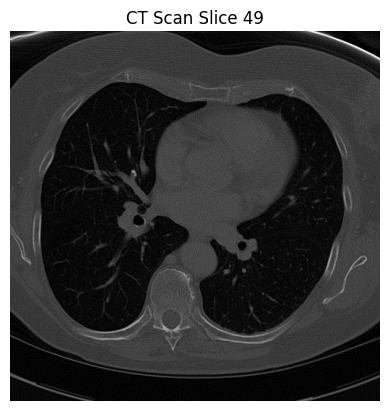

In [21]:
# Visualize a Single Slice of the 3D Volume
import matplotlib.pyplot as plt

slice_idx = vol_tensor.shape[1] // 2  # Select middle slice
plt.imshow(vol_tensor[0, slice_idx].numpy(), cmap="gray")
plt.title(f"CT Scan Slice {slice_idx}")
plt.axis("off")
plt.show()


## tabular data

### Representing Tabular Data in PyTorch

1. Understanding Tabular Data in Machine Learning
   - Data in machine learning often comes from spreadsheets, CSV files, or databases.
   - It is structured as tables where **each row represents a sample** and **each column represents an attribute** of that sample.
   - Unlike time-series data, tabular data is usually **independent of order**.

2. Heterogeneous Nature of Tabular Data
   - Columns can contain **numerical values** (e.g., temperature, weight) or **categorical labels** (e.g., color, type).
   - This heterogeneity contrasts with **PyTorch tensors**, which are **homogeneous** and typically store floating-point numbers for neural network computations.

3. Encoding Tabular Data for Neural Networks
   - Since deep learning models process numerical data, categorical values must be **encoded as numbers**.
   - The goal is to transform real-world data into **PyTorch tensors** for efficient model training.

4. Using the Wine Quality Dataset
   - This dataset contains **chemical characteristics** of vinho verde wine from Portugal along with a **sensory quality score** (0–10).
   - Features include **fixed acidity, volatile acidity, pH, alcohol, and sulfur content**.
   - A possible ML task: **predicting wine quality from chemical properties**.

5. Loading Data into PyTorch
   - Three common methods for loading CSV files:
     1. **CSV module** (basic, built-in Python)
     2. **NumPy** (efficient array operations)
     3. **Pandas** (most memory-efficient)
   - The dataset is loaded as a **NumPy array** and then converted into a **PyTorch tensor** for further processing.

In [2]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, precision=2, linewidth=75)

In [4]:
import csv
wine_path = "data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [5]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))

wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [6]:
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

Handling Wine Quality Scores

. The wine quality score can be treated as:
- A continuous variable (Regression task): Predicts a real number.
- A categorical label (Classification task): Predicts a discrete class.

. Typically, the score is separated from input features to serve as ground truth.


In [7]:
data = wineq[:, :-1] # <1>
data, data.shape

(tensor([[ 7.00,  0.27,  ...,  0.45,  8.80],
         [ 6.30,  0.30,  ...,  0.49,  9.50],
         ...,
         [ 5.50,  0.29,  ...,  0.38, 12.80],
         [ 6.00,  0.21,  ...,  0.32, 11.80]]),
 torch.Size([4898, 11]))

In [8]:
target = wineq[:, -1] #
target, target.shape

(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]))

. Scores can be stored as integer labels
- If labels were categorical strings (e.g., "red" or "white"), an integer mapping could be used.

In [9]:
target = wineq[:, -1].long()
target

tensor([6, 6,  ..., 7, 6])

### One-Hot Encoding for Categorical Labels

- One-Hot Encoding for Categorical Labels
- One-hot encoding transforms scores into binary vectors

Score 1 → [1,0,0,0,0,0,0,0,0,0]

Score 5 → [0,0,0,0,1,0,0,0,0,0]

scatter_() fills values at specific indices along the given dimension (dim=1).

In [10]:
target_onehot = torch.zeros(target.shape[0], 10)

target_onehot.scatter_(1, target.unsqueeze(1), 1.0)


tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [11]:
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed

tensor([[6],
        [6],
        ...,
        [7],
        [6]])

In [14]:
target_onehot_example =torch.tensor([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  
])
target_example = torch.tensor([5, 3, 8])  # Shape (3,)
target_example.unsqueeze(1)  # Shape (3,1)


tensor([[5],
        [3],
        [8]])

In [15]:
target_onehot_example.scatter_(1, target_example.unsqueeze(1), 1.0)


tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

### Normalizing Data for Machine Learning

In [16]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.85e+00, 2.78e-01, 3.34e-01, 6.39e+00, 4.58e-02, 3.53e+01,
        1.38e+02, 9.94e-01, 3.19e+00, 4.90e-01, 1.05e+01])

In [17]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.12e-01, 1.02e-02, 1.46e-02, 2.57e+01, 4.77e-04, 2.89e+02,
        1.81e+03, 8.95e-06, 2.28e-02, 1.30e-02, 1.51e+00])

In [18]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.72e-01, -8.18e-02,  ..., -3.49e-01, -1.39e+00],
        [-6.57e-01,  2.16e-01,  ...,  1.34e-03, -8.24e-01],
        ...,
        [-1.61e+00,  1.17e-01,  ..., -9.63e-01,  1.86e+00],
        [-1.01e+00, -6.77e-01,  ..., -1.49e+00,  1.04e+00]])

In [19]:
bad_indexes = target <= 3 # <1>
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [20]:
bad_indexes

tensor([False, False,  ..., False, False])

In [21]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

##  time series 
- Initially, the dataset consists of hourly bike rental counts in Washington, D.C., along with weather and seasonal information. 

Each row represents an hour, and there is no explicit time-based structure.

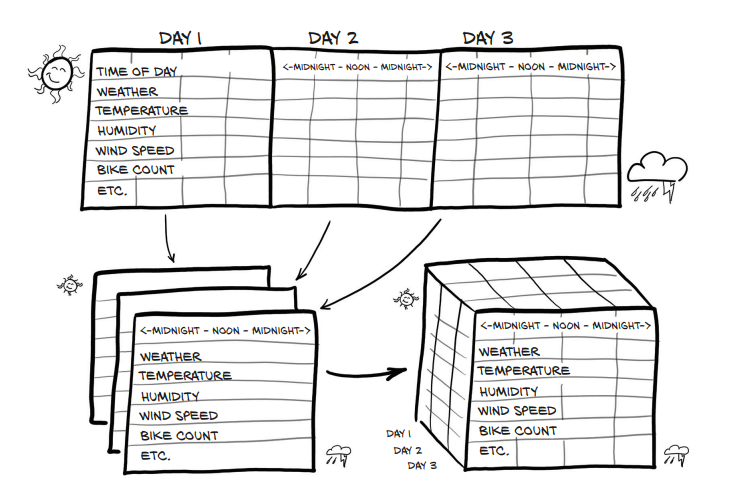

### Key Steps:
. Understanding Time Series Data:
   - Unlike independent rows in a standard dataset, time series data has an inherent order, allowing relationships across time to be leveraged for predictions.
   - Example: The number of bikes rented at a given hour might depend on previous hours' weather conditions.

. Reshaping the Dataset:
   - The dataset is transformed into a format where:
     - One axis represents days.
     - Another axis represents hours within a day.
     - The third axis contains different recorded variables (e.g., temperature, wind speed, bike count).
   - This results in a 3D tensor with the shape **(days, features, hours)**.



**Implementation**:
   - The raw dataset is loaded as a NumPy array and converted into a PyTorch tensor.
   - The dataset originally has **17,520 rows (hours) and 17 columns (features)**.
   - It is reshaped into daily segments using `view(-1, 24, 17)`, grouping 24-hour periods together.
   - A **transpose operation** reorganizes the tensor into the shape **(730 days, 17 features, 24 hours)**, aligning it with standard time-series modeling formats.

In [ ]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50, linewidth=75)
bikes_numpy = np.loadtxt(
    "data/p1ch4/bike-sharing-dataset/hour-fixed.csv", 
    dtype=np.float32, 
    delimiter=",", 
    skiprows=1, 
    converters={1: lambda x: float(x[8:10])}) # <1>
'''
0-> Custom function for column index 1:
1-> Extracts characters at position [8:10] from the string in column 1.
2-> Converts the extracted value into a float.
3-> This suggests that column 1 contains a timestamp. Converts date strings to 
numbers corresponding to the day of the month in column 1

'''
bikes = torch.from_numpy(bikes_numpy)
bikes

tensor([[1.00e+00, 1.00e+00,  ..., 1.30e+01, 1.60e+01],
        [2.00e+00, 1.00e+00,  ..., 3.20e+01, 4.00e+01],
        ...,
        [1.74e+04, 3.10e+01,  ..., 4.80e+01, 6.10e+01],
        [1.74e+04, 3.10e+01,  ..., 3.70e+01, 4.90e+01]])

In [23]:
#It tells you how many memory locations you need to jump to access the next element in each dimension.
bikes.shape, bikes.stride()

(torch.Size([17520, 17]), (17, 1))

**Benefits of Transformation**:
   - Allows the model to learn temporal patterns (e.g., daily trends, weather impacts).
   - Enables fixed-size chunks for easier training in deep learning models.

The next step would be applying machine learning techniques to analyze and predict bike rentals based on historical trends and weather conditions.

.view() reshapes the tensor without changing its data.
- The new shape: (-1, 24, bikes.shape[1]) translates to:
- -1 → PyTorch automatically infers the number of rows needed.
- 24 → Each row now groups 24 hourly entries into one day.
- bikes.shape[1] → Keeps the same number of columns/features (17).

In [24]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [25]:

daily_bikes = daily_bikes.transpose(1, 2)
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

### Training 



**Handling Categorical Variables:**
   - The "weather situation" variable is ordinal (ranging from 1 to 4), representing good to bad weather.
   - It can be treated as either:
     - A categorical variable using **one-hot encoding** (creating separate columns for each level).
     - A continuous variable by normalizing it to the range **[0.0, 1.0]**.

**One-Hot Encoding:**
   - A **zero-filled tensor** is initialized for encoding weather categories.
   - `scatter_()` is used to place **1s** in the corresponding positions.
   - The new encoded matrix is concatenated with the original dataset along the feature axis.


### One day

In [26]:
first_day = bikes[:24].long()
print(f"first day shape: {first_day.shape}")
weather_onehot = torch.zeros(first_day.shape[0], 4)
first_day[:,9]

first day shape: torch.Size([24, 17])


tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 2])

In [27]:
weather_onehot.scatter_(
    dim=1, 
    index=first_day[:,9].unsqueeze(1).long() - 1, # <1>
    value=1.0)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [28]:
torch.cat((bikes[:24], weather_onehot), 1)[:1]


tensor([[ 1.00,  1.00,  1.00,  0.00,  1.00,  0.00,  0.00,  6.00,  0.00,
          1.00,  0.24,  0.29,  0.81,  0.00,  3.00, 13.00, 16.00,  1.00,
          0.00,  0.00,  0.00]])

### All data

In [29]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4,
                                   daily_bikes.shape[2])
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [30]:

daily_weather_onehot.scatter_(
    1, daily_bikes[:,9,:].long().unsqueeze(1) - 1, 1.0)
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [34]:
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)


### continuous variable

In [ ]:

daily_bikes[:, 9, :] = (daily_bikes[:, 9, :] - 1.0) / 3.0


**Normalization of Numerical Features:**
   - Continuous variables like temperature are **scaled** to the range **[0.0, 1.0]** or standardized using **mean and standard deviation**.
   - This normalization improves training stability and helps models converge faster.


In [33]:
temp = daily_bikes[:, 10, :]
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - torch.mean(temp))
                         / torch.std(temp))

## Representing Text for Deep Learning
Deep learning has revolutionized Natural Language Processing (NLP) by replacing rule-based systems with models that learn directly from large text datasets. Traditional Recurrent Neural Networks (RNNs) process text sequentially, but newer transformer models handle long-range dependencies more effectively.

### Converting Text to Numeric Representations
To apply deep learning to text, we must convert it into a **tensor of numbers**:
- **Character-Level Encoding**: Processes text one character at a time.
- **Word-Level Encoding**: Uses words as the smallest processing units.


## One-hot-encoding characters
- Each character is represented as a vector where **only one element is "1"**, and the rest are **zeros**.
- **ASCII encoding** (128 characters) is commonly used for English text, while **Unicode** supports a broader range of languages.
- The **Project Gutenberg** dataset (e.g., *Pride and Prejudice*) is used for demonstration.

In [35]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

with open('data/p1ch4/jane-austen/1342-0.txt', encoding='utf8') as f:
    text = f.read()
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

128 the limits of ASCII

In [36]:
letter_t = torch.zeros(len(line), 128) 
letter_t.shape

torch.Size([70, 128])

In [ ]:
#Note that letter_t holds a one-hot-encoded character per row
#Removes leading and trailing spaces from line
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0  # <1>
    letter_t[i][letter_index] = 1

###  One-hot encoding whole words


In [38]:
# takes text and returns it in lowercase and stripped of punctuation
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-'
    word_list = input_str.lower().replace('\n',' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [40]:
#build a mapping of words to indexes
word_list = sorted(set(clean_words(text)))
#t word2index_dict is now a dictionary with words as keys and an integer as a
#value.
word2index_dict = {word: i for (i, word) in enumerate(word_list)}

print(len(word2index_dict))
print(word2index_dict['impossible'])

7261
3394


In [41]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict))
print(f" word_t shape: {word_t.shape}")

for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))
    
print(word_t.shape)

 word_t shape: torch.Size([11, 7261])
 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him
torch.Size([11, 7261])


### Three ways to encode a word
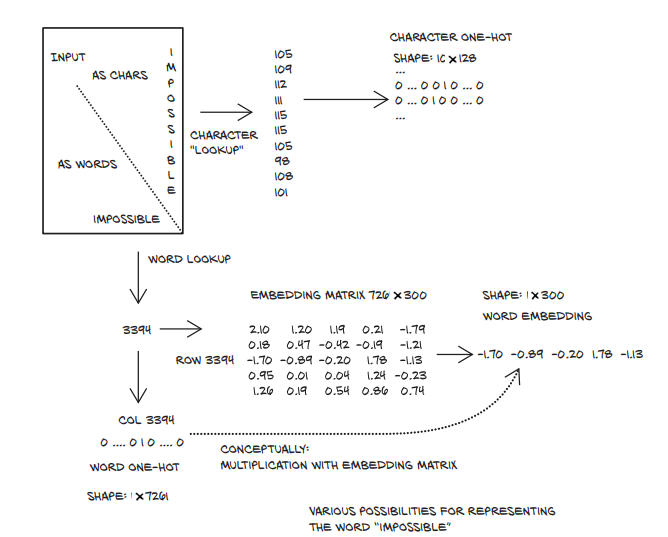

### Text embedding


#### One-Hot Encoding and Its Limitations
- One-hot encoding is a common method for representing categorical data, including words in text processing.
- However, it becomes inefficient when dealing with a large vocabulary, such as a book with 7,000+ unique words.
- The issue: Every new word requires a new column in the representation, making the model inefficient and hard to scale.

#### Word Embeddings: A More Efficient Alternative
- Instead of using sparse one-hot vectors, words can be represented as **dense floating-point vectors** in a fixed-dimensional space (e.g., 100 or 300 dimensions).
- This representation, known as **word embeddings**, allows words with similar meanings to be placed closer together in the vector space.

#### How Word Embeddings Work
- The goal is to map words into a space where words used in similar contexts have similar vector representations.
- Instead of manually designing the mapping, embeddings are learned from large text corpora using algorithms like **Word2Vec** or **neural networks**.

#### Concept of Similarity in Embeddings
- Words with related meanings or contextual usage appear **closer** in the embedding space.
- Example: If "apple" is embedded in a space where one axis represents fruit and another represents color, words like "tangerine" and "lemon" will be nearby.
- Embeddings allow meaningful operations like **analogies**: e.g., **King - Man + Woman ≈ Queen**.

#### Modern Context-Aware Embeddings
- Older models like **Word2Vec** and **GloVe** provide fixed embeddings for words.
- **Modern models (e.g., BERT, GPT-2)** generate embeddings dynamically based on the word’s **context** in a sentence.

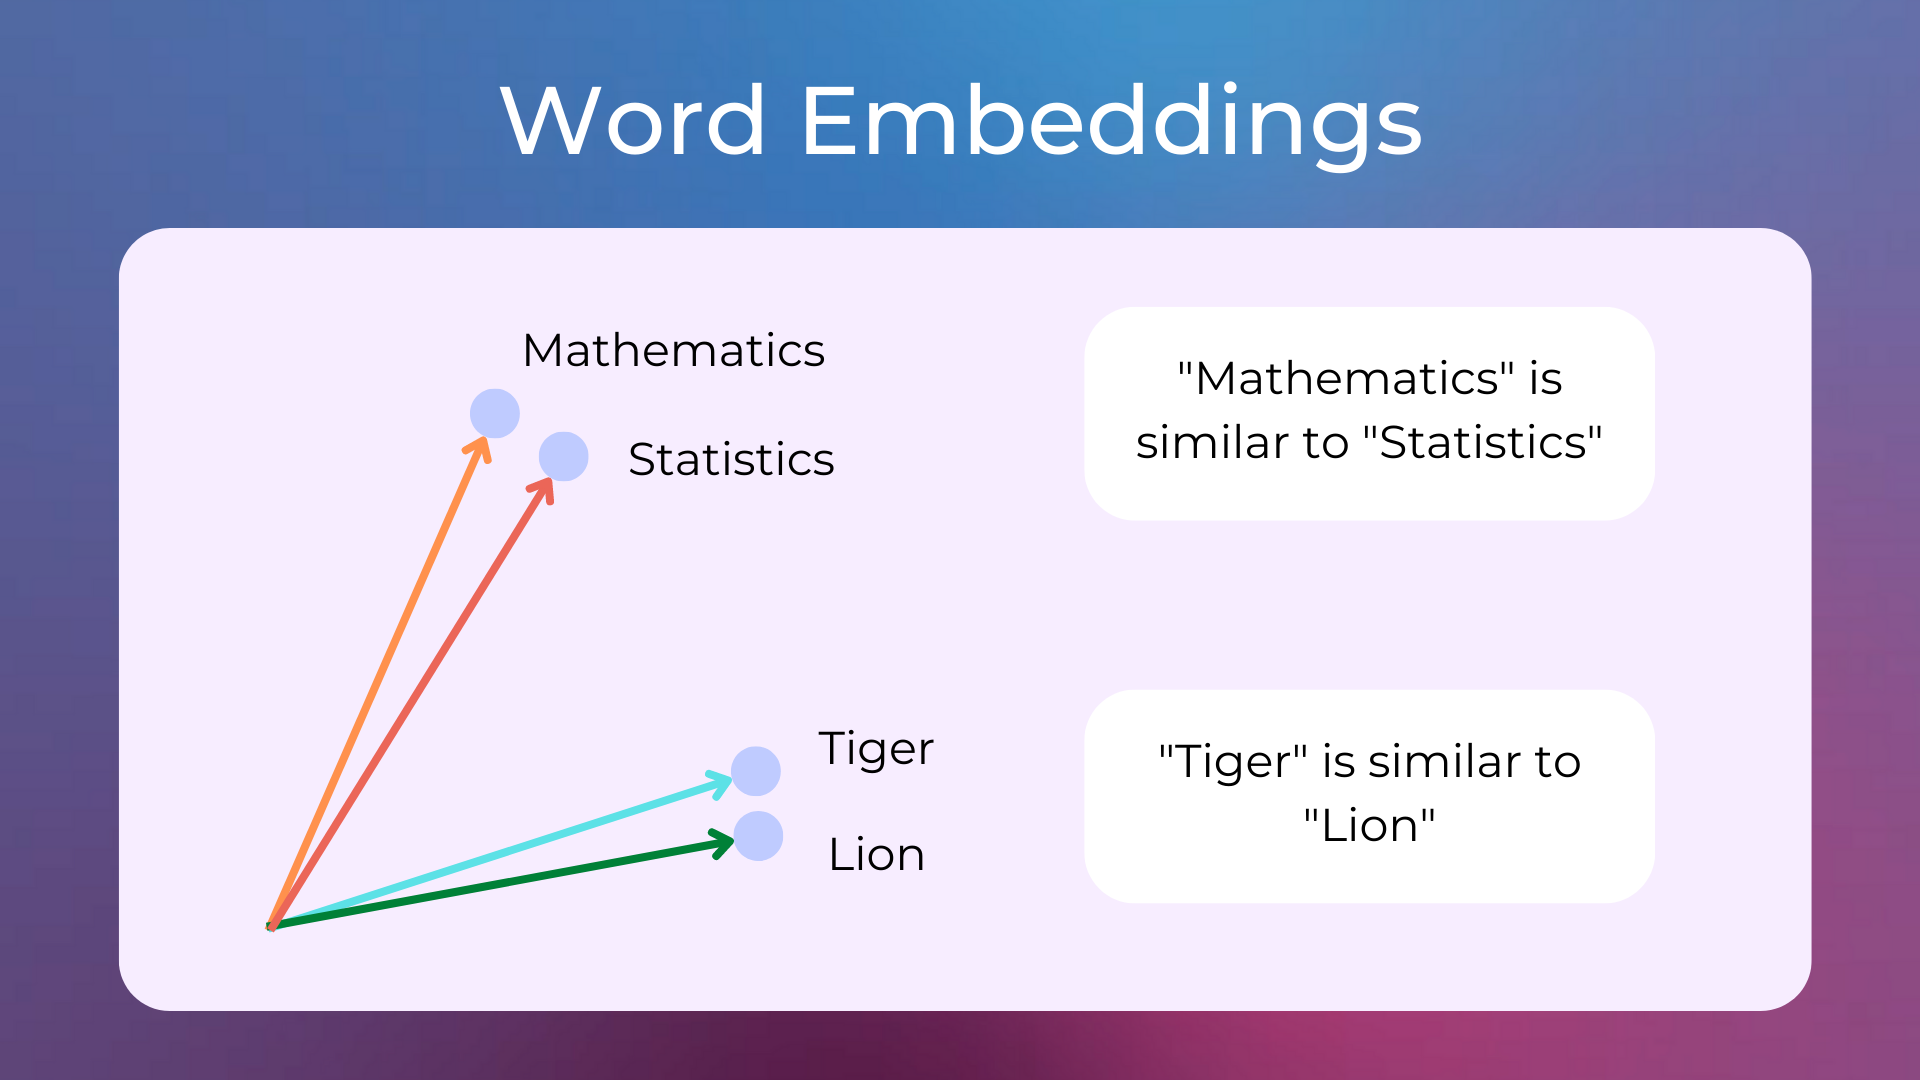